In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('./data/cleaned_music.csv')

In [4]:
df.head()

,energy,tempo,danceability,loudness,liveness,valence,speechiness,instrumentalness,mode,key,duration_ms,acousticness,genre
0,0.000202,71.599,0.1240,-43.713,0.1100,0.0346,0.0987,0.972,1.0,0.0,186388.0,0.970,ambient
1,0.000237,73.664,0.1720,-44.525,0.1100,0.0383,0.0671,0.967,1.0,0.0,195466.0,0.973,ambient
2,0.000487,172.224,0.0823,-34.601,0.1100,0.0349,0.0505,0.873,1.0,1.0,138142.0,0.976,ambient
3,0.000539,134.125,0.1520,-35.475,0.1080,0.0371,0.0512,0.934,1.0,3.0,205738.0,0.913,ambient
4,0.000546,141.408,0.1350,-43.098,0.0908,0.0487,0.0559,0.970,1.0,3.0,180923.0,0.972,ambient


In [5]:
X = df.drop(columns=['genre'])
y = df['genre']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [7]:
scaler = StandardScaler()

In [8]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

## Modeling

I trained KNN and RF using gridsearchcv, and then saved the best of the models to pickle files to not run them over and over. 

### KNN

In [10]:
knn = KNeighborsClassifier()

In [11]:
param_grid = {'n_neighbors': np.arange(3, 31, 2),
             'metric': ['minkowski', 'manhattan', 'cosine'],
             'weights': ['uniform', 'distance']}

In [12]:
# knn_grid = GridSearchCV(knn, param_grid, cv=kf)

In [13]:
# knn_grid.fit(X_train_scaled,y_train)

In [14]:
# knn_grid.best_score_

In [15]:
# knn_grid.best_params_

In [16]:
# knn_grid.score(X_train_scaled, y_train)

In [17]:
# knn_grid.score(X_test_scaled, y_test)

### Random Forest

In [18]:
rf = RandomForestClassifier(random_state=42)

In [19]:
rf_param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}

In [20]:
# rf_grid = GridSearchCV(rf, rf_param_grid, cv=kf)

In [21]:
# rf_grid.fit(X_train_scaled, y_train)

In [22]:
# rf_grid.score(X_train_scaled, y_train)

In [23]:
# rf_grid.score(X_test_scaled, y_test)

In [24]:
# rf_grid.best_params_

In [25]:
import pickle

In [26]:
# with open('./best_models/rf.pkl', 'wb') as file:
#     pickle.dump(rf_grid.best_estimator_, file)

In [27]:
# with open('./best_models/knn.pkl', 'wb') as file:
#     pickle.dump(knn_grid.best_estimator_, file)

### Logistic Regression

In [28]:
lr = LogisticRegression()

In [29]:
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver':['lbfgs', 'sag', 'saga']
}

In [30]:
lr_grid = GridSearchCV(lr, lr_param_grid, cv=kf)

In [31]:
# lr_grid.fit(X_train, y_train)

In [32]:
# lr_grid.best_score_

In [33]:
# lr_grid.score(X_test, y_test)

In [34]:
# lr_grid.best_params_

In [35]:
# with open('./best_models/lr.pkl', 'wb') as file:
#     pickle.dump(lr_grid.best_estimator_, file)

### Ridge

In [36]:
from sklearn.linear_model import RidgeClassifierCV

In [37]:
rc = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100], cv=3, class_weight='balanced')

In [38]:
rc.fit(X_train, y_train)

RidgeClassifierCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100],
                  class_weight='balanced', cv=3)

In [39]:
rc.score(X_test, y_test)

0.3624856156501726

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
gbc_grid_params = {
    'n_estimators': np.arange(50, 300, 50),
    'n_iter_no_change': np.arange(5, 15, 1),
    'max_depth': [3, 4, 5]
}

In [43]:
# gbc = GradientBoostingClassifier(n_estimators=200, n_iter_no_change=10)
gbc = GradientBoostingClassifier(random_state=42)

In [44]:
gbc_grid = RandomizedSearchCV(gbc, gbc_grid_params, cv=3, n_iter=5)

In [45]:
# gbc_grid.fit(X_train_scaled, y_train)

In [46]:
# gbc_grid.score(X_test_scaled, y_test)

In [47]:
# gbc_grid.best_params_

In [48]:
# with open('./best_models/gbc.pkl', 'wb') as file:
#     pickle.dump(gbc_grid.best_estimator_, file)

## Model Results

In [49]:
knn =  pickle.load(open('./best_models/knn.pkl','rb'))
rf =  pickle.load(open('./best_models/rf.pkl','rb'))
lr =  pickle.load(open('./best_models/lr.pkl','rb'))

In [50]:
knn.score(X_test_scaled, y_test)

0.428078250863061

In [51]:
rf.score(X_test_scaled, y_test)

0.47756041426927504

In [52]:
lr.score(X_test, y_test)

0.1852704257767549

## Best Model

The best model is Random Forest

In [53]:
rf_preds = rf.predict(X_test_scaled)

In [54]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [55]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

     ambient       0.49      0.46      0.47        90
      arabic       0.24      0.13      0.17        52
   brazilian       0.65      0.30      0.41        37
  electronic       0.53      0.54      0.54       145
     hip-hop       0.43      0.56      0.48        95
       latin       0.41      0.40      0.40       105
        lofi       0.77      0.93      0.84        74
         pop       0.36      0.53      0.43       129
        rock       0.55      0.47      0.51        85
       world       0.45      0.09      0.15        57

    accuracy                           0.48       869
   macro avg       0.49      0.44      0.44       869
weighted avg       0.48      0.48      0.46       869



<Figure size 1000x1600 with 0 Axes>

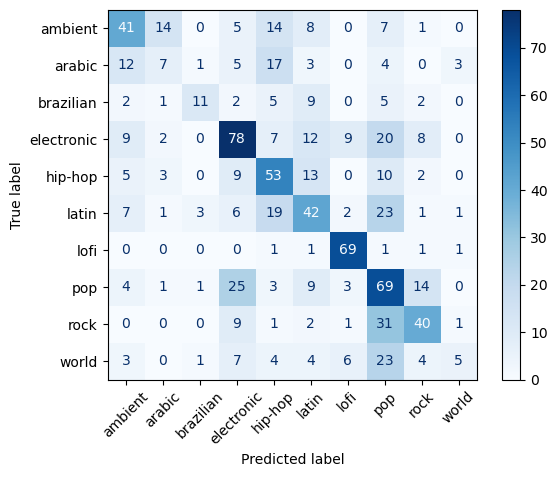

In [64]:
plt.figure(figsize=(10, 16))
ConfusionMatrixDisplay.from_estimator(rf, X_test_scaled, y_test, cmap='Blues')
plt.xticks(rotation=45);

In [57]:
# with open('./scaler.pkl', 'wb') as file:
#     pickle.dump(scaler, file)

In [58]:
X_test_scaled[0].reshape(1, -1)

array([[ 0.05036293, -1.24888171,  0.74468654,  0.48586907, -0.87460752,
         1.66683979,  2.40205101, -0.53208966, -1.11996663, -1.17548742,
        -0.01517234, -0.05260146]])

In [59]:
X_test.head(1)

,energy,tempo,danceability,loudness,liveness,valence,speechiness,instrumentalness,mode,key,duration_ms,acousticness
1515,0.615,84.07,0.775,-5.682,0.0595,0.918,0.368,0.0,0.0,1.0,197143.0,0.304


In [60]:
rf.predict(X_test_scaled[0].reshape(1, -1))

array(['hip-hop'], dtype=object)

In [73]:
probs = rf.predict_proba(X_test_scaled[0].reshape(1, -1))[0]
probs

array([0.23464683, 0.07635714, 0.03382857, 0.03442381, 0.31473175,
       0.15239286, 0.0065    , 0.0925    , 0.0065    , 0.04811905])

In [68]:
rf.classes_

array(['ambient', 'arabic', 'brazilian', 'electronic', 'hip-hop', 'latin',
       'lofi', 'pop', 'rock', 'world'], dtype=object)

In [76]:
probas = {}
for g, p in zip(rf.classes_, probs):
    probas[g] = p.round(2)

In [77]:
probas

{'ambient': 0.23,
 'arabic': 0.08,
 'brazilian': 0.03,
 'electronic': 0.03,
 'hip-hop': 0.31,
 'latin': 0.15,
 'lofi': 0.01,
 'pop': 0.09,
 'rock': 0.01,
 'world': 0.05}

In [61]:
y_test.head()

1515       hip-hop
2180           pop
799     electronic
1771       hip-hop
1424       ambient
Name: genre, dtype: object

In [65]:
X_test.head()

,energy,tempo,danceability,loudness,liveness,valence,speechiness,instrumentalness,mode,key,duration_ms,acousticness
1515,0.615,84.070,0.775,-5.682,0.0595,0.918,0.3680,0.0,0.0,1.0,197143.0,0.304000
2180,0.711,146.921,0.487,-4.220,0.1520,0.317,0.0322,0.0,1.0,8.0,151647.0,0.000175
799,0.449,114.924,0.669,-7.658,0.0729,0.327,0.0490,0.0,0.0,0.0,213493.0,0.184000
1771,0.655,139.955,0.845,-5.137,0.0974,0.516,0.0612,0.0,0.0,5.0,164571.0,0.239000
1424,0.594,114.748,0.580,-7.229,0.1010,0.520,0.3170,0.0,1.0,6.0,221217.0,0.162000


In [66]:
X_test.describe()

,energy,tempo,danceability,loudness,liveness,valence,speechiness,instrumentalness,mode,key,duration_ms,acousticness
count,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000
mean,0.599768,117.686901,0.646247,-8.757534,0.168801,0.500618,0.103604,0.187332,0.569620,5.162255,197347.214039,0.320489
std,0.234073,27.999352,0.171505,6.245541,0.125719,0.254084,0.102303,0.346966,0.495414,3.550511,56248.732362,0.310344
min,0.000237,48.232000,0.059700,-44.525000,0.023200,0.030700,0.023200,0.000000,0.000000,0.000000,70820.000000,0.000010
25%,0.470000,96.003000,0.547000,-9.959000,0.095000,0.297000,0.038400,0.000000,0.000000,2.000000,157154.000000,0.061500
50%,0.651000,116.947000,0.671000,-7.028000,0.119000,0.498000,0.057400,0.000064,1.000000,5.000000,191571.000000,0.200000
75%,0.774000,135.975000,0.769000,-5.298000,0.198000,0.695000,0.120000,0.069700,1.000000,8.000000,228000.000000,0.531000
max,0.989000,206.247000,0.967000,0.914000,0.972000,0.976000,0.569000,0.971000,1.000000,11.000000,535093.000000,0.995000
